In [ ]:
import skimage
import tifffile as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import ndimage

In [ ]:
#definition der directories zum einlesen und speichern 
base = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20230105_IMC-Denoise/evaluation/"
out = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20230105_IMC-Denoise/thresholded"


#dict initialisieren und aus den foldern die files einlesen, es wird unterschieden in "raw" und "denoised"
results = {}
for (dir_path, dir_names, file_names) in os.walk(base):
    
    for file in file_names:
        
        #hier wird sample eingelesen und bestimmt ob es raw oder denoised ist
        sample = dir_path.split("/")[-1]
        name = file.split(".")[0]
        t = name.split("_")[1]
        m = name.split("_")[0]
        
        im = tf.imread(os.path.join(dir_path, file))
        #wenn raw dann noch median filtern
        if t == "raw":
            im = ndimage.median_filter(im, size=3)
        
        #thresholding mit yen filtering
        threshold = skimage.filters.threshold_yen(im)
        t_im = im.copy()
        #binärisierung der Bilder
        t_im[im <= threshold] = 0
        t_im[im > threshold] = 1

        #falls sample folder noch nicht existiert dann hier erstellen
        if not os.path.isdir(os.path.join(out, sample)):
            os.mkdir(os.path.join(out, sample))
            
        #speichern des ergebnisses
        tf.imwrite(os.path.join(out, sample, f"{m}_{t}_thresh.tiff"), t_im)

In [31]:
#hier der code nur um zu schaien welches die kleinsten masken hat (im.sum())
out = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20230105_IMC-Denoise/thresholded"

results = {"files": [], "sum": []}
for (dir_path, dir_names, file_names) in os.walk(out):
    
    for file in file_names:
        im = tf.imread(os.path.join(dir_path, file))
        results["files"].append(os.path.join(dir_path, file))
        results["sum"].append(im.sum())

In [32]:
import pandas as pd

df = pd.DataFrame.from_dict(results)

In [35]:
df = df.sort_values(by="sum")

df

,files,sum
3553,/data_isilon_main/isilon_images/10_MetaSystems...,5.0
1006,/data_isilon_main/isilon_images/10_MetaSystems...,8.0
4086,/data_isilon_main/isilon_images/10_MetaSystems...,8.0
3161,/data_isilon_main/isilon_images/10_MetaSystems...,8.0
3860,/data_isilon_main/isilon_images/10_MetaSystems...,13.0
...,...,...
1488,/data_isilon_main/isilon_images/10_MetaSystems...,84922.0
1487,/data_isilon_main/isilon_images/10_MetaSystems...,85307.0
1096,/data_isilon_main/isilon_images/10_MetaSystems...,94352.0
1347,/data_isilon_main/isilon_images/10_MetaSystems...,98799.0


/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20230105_IMC-Denoise/thresholded/20220106_16-1454_BM_ROI_001_IF_IMC/Ki-67_raw_thresh.tiff


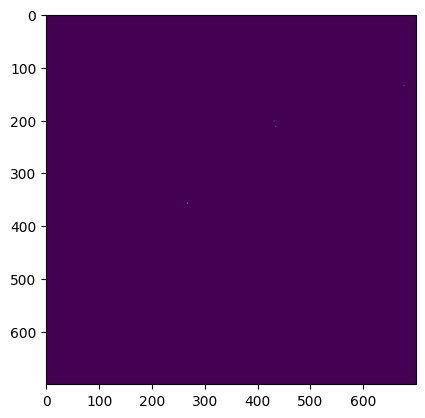

/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20230105_IMC-Denoise/thresholded/20211227_14-3450_BM_ROI_007_IF_IMC/S100B_raw_thresh.tiff


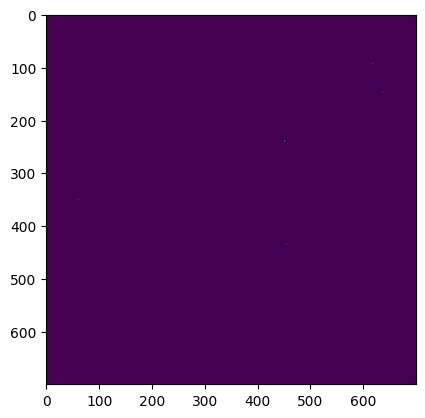

/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20230105_IMC-Denoise/thresholded/20211227_09-0920_BM_ROI_007_IF_IMC/S100B_raw_thresh.tiff


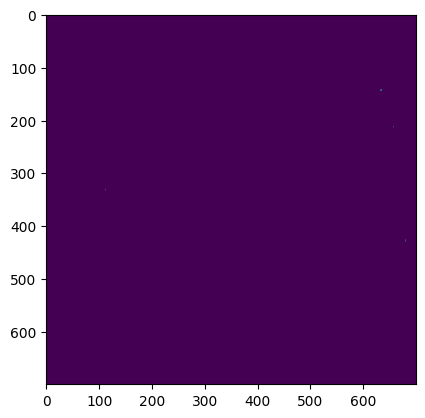

/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20230105_IMC-Denoise/thresholded/20220223_06-2373_BM_R_ROI_002_IF_IMC/Ki-67_raw_thresh.tiff


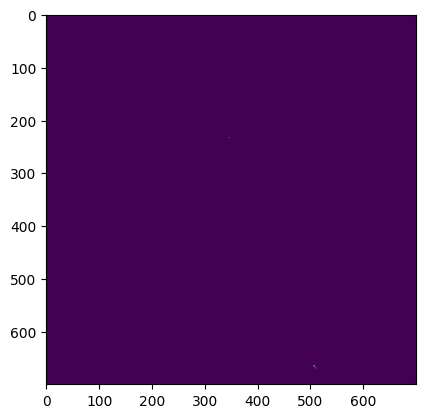

/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20230105_IMC-Denoise/thresholded/20220205_17-4599_BM_ROI_003_IF_IMC/CD274_raw_thresh.tiff


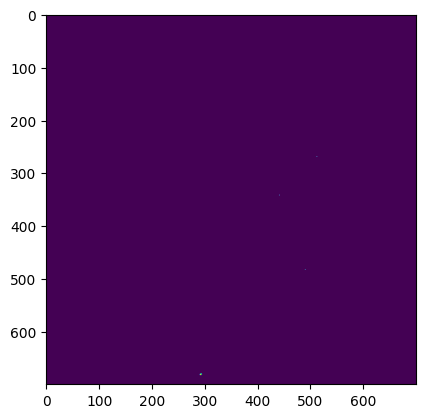

In [56]:
#darstellen der 5 kleinsten
import matplotlib.pyplot as plt
for i in range(5):
    file = str(list(df.files)[i])
    print(file)
    im = tf.imread(file)
    plt.imshow(im)
    plt.show()

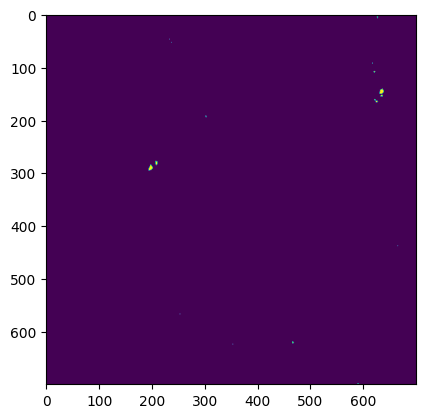

In [61]:
im = tf.imread("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20230105_IMC-Denoise/thresholded/20211227_14-3450_BM_ROI_007_IF_IMC/S100B_denoised_thresh.tiff")
plt.imshow(im)
plt.show()